# ESTIMATING COEFFICIENTS

In [195]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
x = np.arange(0,20)

In [197]:
y = np.random.normal(x, 5, 20)

In [198]:
a = sum((x - x.mean())*(y - y.mean()))/sum((x - x.mean())**2)

In [199]:
b = y.mean() - a * x.mean()

In [200]:
pred_y = a*x+b

In [201]:
arr_x = np.arange(int(round(y.min())),int(round(y.max())))
arr_y = np.arange(int(round(x.min())),int(round(x.max())))
ones_x = np.ones(len(arr_x))
ones_y = np.ones(len(arr_y))

In [202]:
a

1.2101153398768687

Text(0,0.5,'y label')

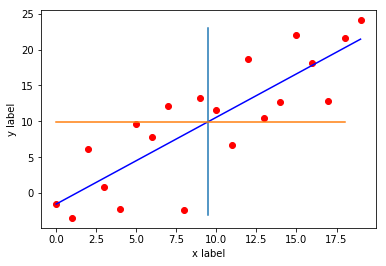

In [203]:
plt.plot(x,y, 'ro')
plt.plot(x,pred_y, 'b')
plt.plot(x.mean()*ones_x,arr_x)
plt.plot(arr_y, y.mean()*ones_y)
plt.xlabel('x label')
plt.ylabel('y label')

# ASSESSING THE ACCURACY OF THE COEFFICIENT ESTIMATES

In [41]:
f = np.random.randint(-3,3,100)
fx = 2+f*3

In [42]:
x = np.random.normal(0,1,100)

In [43]:
y = np.random.normal(2+3*x,5,100)

In [44]:
a = sum((x - x.mean())*(y - y.mean()))/sum((x - x.mean())**2)
b = y.mean() - a * x.mean()
pred_1 = a*x+b
print(a)
print(b)

3.5235475057107664
1.7589760703495956


In [45]:
y = np.random.normal(2+3*x,5,100)

In [46]:
a = sum((x - x.mean())*(y - y.mean()))/sum((x - x.mean())**2)
b = y.mean() - a * x.mean()
pred_2 = a*x+b
print(a)
print(b)

2.4747423127504624
2.701275006017309


In [47]:
y = np.random.normal(2+3*x,5,100)

In [48]:
a = sum((x - x.mean())*(y - y.mean()))/sum((x - x.mean())**2)
b = y.mean() - a * x.mean()
pred_3 = a*x+b
print(a)
print(b)

3.1723164954863834
2.015243801482914


In [49]:
y = np.random.normal(2+3*x,5,100)

In [50]:
a = sum((x - x.mean())*(y - y.mean()))/sum((x - x.mean())**2)
b = y.mean() - a * x.mean()
pred_4 = a*x+b
print(a)
print(b)

3.560420573624632
1.9099553511490412


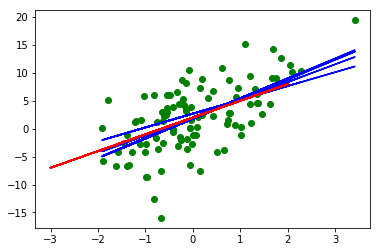

In [51]:
plt.plot(x,y,'go')

plt.plot(x, pred_1, 'b')
plt.plot(x, pred_2, 'b')
plt.plot(x, pred_3, 'b')
plt.plot(x, pred_4, 'b')
plt.plot(f,fx,'r')

# EXAMPLE

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
X = df['TV']
y = df['sales']

In [6]:
b1 = sum((X - X.mean())*(y - y.mean()))/sum((X - X.mean())**2)
b0 = y.mean() - b1 * X.mean()
pred_y = b0 + (b1 * X)

Text(0,0.5,'sales')

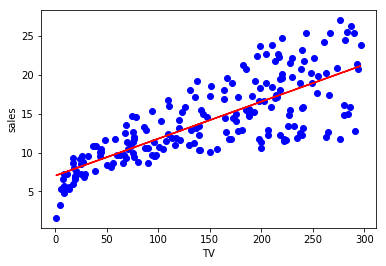

In [9]:
plt.plot(X,y,'bo')
plt.plot(X,pred_y,'r')
plt.xlabel('TV')
plt.ylabel('sales')

In [10]:
print('b0 = {b0}, b1 = {b1}\n\
And this mean that without any advertising, \
sales will fall around {b0} units, and for each 1000$ increase \
in TV advertising, there will be increase of {b1} units'.format(b0=round(b0,2), 
                                    b1=round(b1,4)))

b0 = 7.03, b1 = 0.0475
And this mean that without any advertising, sales will fall around 7.03 units, and for each 1000$ increase in TV advertising, there will be increase of 0.0475 units


In [11]:
#residual sum of squares
RSS = np.sum((y-pred_y)**2)
#standard error
SE = ((y.std())**2)/len(X)
#residual standard error 
#the average amount that the response will deviate from 
#the true regression line
RSE = np.sqrt(RSS/(len(X)-2))
#standard error of b0
SEb0 = np.sqrt((RSE**2)*((1/len(X))+((X.mean()**2)/(np.sum((X-X.mean())**2)))))
#standard error of b1
SEb1 = np.sqrt((RSE**2) / (np.sum((X-X.mean())**2)))

In [12]:
print('Standard error tells us the average amount that estimate of b0\
 and b1 differs from actual value of b0 and b1.\n\
In this case standard error of:\n\
b0 = {SEb0}\n\
b1 = {SEb1}'.format(SEb0 = round(SEb0,4), 
                    SEb1 = round(SEb1,4)))

Standard error tells us the average amount that estimate of b0 and b1 differs from actual value of b0 and b1.
In this case standard error of:
b0 = 0.4578
b1 = 0.0027


In [13]:
#Confidence intervals (95%)
b1_low = b1-2*SEb1
b1_upper = b1+2*SEb1
b0_low = b0-2*SEb0
b0_upper = b0+2*SEb0

In [14]:
print('Furthermore standard errors can be used to compute confidience \
intervals. A 95% confidence interval is defined as a range of values \
such that with 95% probability, the range will contain the true unknown \
value of the parameter. In the case of the advertising data, the 95 % \
confidence interval for:\n\
β0 is [{b0_low}, {b0_upper}]\n\
β1 is [{b1_low}, {b0_upper}]\n\
Therefore, we can conclude that in the absence of any advertising, \
sales will, on average, fall somewhere between {b0_low} and {b0_upper} \
units. Furthermore, for each $1,000 increase in television advertising, \
there will be an average increase in sales of between {b1_low} and \
{b1_upper} units.'
      .format(b0_low = round(b0_low,3), 
              b0_upper = round(b0_upper,3),
              b1_low = round(b1_low,3), 
              b1_upper = round(b1_upper,3)))

Furthermore standard errors can be used to compute confidience intervals. A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. In the case of the advertising data, the 95 % confidence interval for:
β0 is [6.117, 7.948]
β1 is [0.042, 7.948]
Therefore, we can conclude that in the absence of any advertising, sales will, on average, fall somewhere between 6.117 and 7.948 units. Furthermore, for each $1,000 increase in television advertising, there will be an average increase in sales of between 0.042 and 0.053 units.


In [15]:
#t-statistic for b1 & b0
t1 = b1/SEb1
t0 = b0/SEb0

In [59]:
#p-value for t1 & t0
p_value1 = 2 * (1 - scipy.stats.t.cdf(np.abs(t1), 30))
p_value0 = 2 * (1 - scipy.stats.t.cdf(np.abs(t0), 30))

In [61]:
data_simple_lr = np.array([[b0,b1],
                           [SEb0,SEb1],
                           [t0,t1],
                           [int(p_value0),int(p_value1)]])

In [62]:
pd.DataFrame(data_simple_lr.T, 
             columns=['Coefficient', 'Std. error', 't-statistic', 'p-value'],
            index=['Intercept', 'TV'])

,Coefficient,Std. error,t-statistic,p-value
Intercept,7.032594,0.457843,15.360275,0.0
TV,0.047537,0.002691,17.667626,0.0


# Assesing the accuracy of the model

#### 1. RSE
the average amount that the response will deviate 
from the true regression line 


#### 2. R^2 
It takes the form of a proportion (takes value between 0 & 1) 

Independent of scale Y

Better if close to 1

R_squared = (TSS - RSS)/TSS = 1- RSS/TSS

TSS = sum((y - y.mean())**2)

In [40]:
round(RSE,2)

3.26

In [39]:
TSS = np.sum((y-y.mean())**2)
R_squared = 1- RSS/TSS
round(R_squared,2)

0.61

# Multiple linear regression

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
%matplotlib inline

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('advertising.csv')

In [73]:
def simple_regression_of_sales_on_newspaper():
    X_newspaper = df['newspaper']
    b1 = sum((X_newspaper - X_newspaper.mean())*(y - y.mean()))/sum((X_newspaper - X_newspaper.mean())**2)
    b0 = y.mean() - b1 * X_newspaper.mean()
    pred_y_newspaper = b0 + (b1 * X_newspaper)
    RSS = np.sum((y-pred_y_newspaper)**2)
    SE = ((y.std())**2)/len(X_newspaper)
    RSE = np.sqrt(RSS/(len(X_newspaper)-2))
    SEb0 = np.sqrt((RSE**2)*((1/len(X_newspaper))+((X_newspaper.mean()**2)/(np.sum((X_newspaper-X_newspaper.mean())**2)))))
    SEb1 = np.sqrt((RSE**2) / (np.sum((X_newspaper-X_newspaper.mean())**2)))
    t1 = b1/SEb1
    t0 = b0/SEb0
    p_value1 = 2 * (1 - scipy.stats.t.cdf(np.abs(t1), 30))
    p_value0 = 2 * (1 - scipy.stats.t.cdf(np.abs(t0), 30))
    data_simple_lr = np.array([[b0,b1],
                               [SEb0,SEb1],
                               [t0,t1],
                               [int(p_value0),int(p_value1)]])
    newspaper_df = pd.DataFrame(data_simple_lr.T.round(3), 
                 columns=['Coefficient', 'Std. error', 't-statistic', 'p-value'],
                index=['Intercept', 'newspaper'])
    return newspaper_df


In [57]:
df.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [61]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [62]:
X = df.drop('sales', axis=1)
y = df['sales']

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
# RSE = np.sqrt(RSS/(X.shape[0]-X.shape[1]))
# RSE

In [66]:
#Coefficient & Intercept
coef = lm.coef_
inter = lm.intercept_
#predictions
pred_y = lm.predict(X)
RSS = np.sum((y-pred_y)**2)/(X.shape[0] - X.shape[1])
#standard errors
standard_error = np.array([np.sqrt(np.diagonal(RSS * np.linalg.inv(np.dot(X.T,X))))])
Intercept_std_err = (np.sqrt((RSS**2)*((1/X.shape[0])+((X.mean()**2)/(np.sum((X-X.mean())**2)))))).mean()
#t-statistic
Intercept_t_stat = inter / Intercept_std_err
t_stat = coef / standard_error
#p-values
Intercept_p_value = 2 * (1 - scipy.stats.t.cdf(np.abs(Intercept_t_stat), 30))
p_value = 2 * (1 - scipy.stats.t.cdf(np.abs(t_stat), 30))


In [67]:
Coefficients = np.hstack((inter, coef))
Std_err = np.hstack((Intercept_std_err,standard_error.reshape(3,)))
t_statistic = np.hstack((Intercept_t_stat,t_stat.reshape(3,)))
p_vals = np.hstack((Intercept_p_value,p_value.reshape(3,)))

In [68]:
data = np.array([Coefficients.round(3), 
                 Std_err.round(4), 
                 t_statistic.round(2), 
                 p_vals.round(4)])

In [69]:
pd.DataFrame(data.T, 
             columns=['Coefficient', 'Std. error', 't-statistic', 'p-value'], 
             index=['Intercept', 'TV', 'radio', 'newspaper'])

,Coefficient,Std. error,t-statistic,p-value
Intercept,2.939,0.3714,7.91,0.0000
TV,0.046,0.0011,41.54,0.0000
radio,0.189,0.0078,24.13,0.0000
newspaper,-0.001,0.0055,-0.19,0.8528


In [74]:
simple_regression_of_sales_on_newspaper()

,Coefficient,Std. error,t-statistic,p-value
Intercept,12.351,0.621,19.876,0.0
newspaper,0.055,0.017,3.300,0.0


###### Interpret
For a given amount of TV and newspaper advertising, spending an additional $1,000 on radio advertising leads to an increase in sales by approximately 189 units. 

But in simple_regression_of_sales_on_newspaper we see that the coefficient estimate is non-zero, when in multiple regression is close to 0 and corresponding p-value is no longes significant. 

It is because in simple_regression_of_sales_on_newspaper, predictors TV and radio are ignored. 

###### Important questions
1. Is at least one of the predictors X1 , X2 , . . . , Xp useful in predicting the response?

2. Do all the predictors help to explain Y, or is only a subset of the predictors useful?

3. How well does the model fit the data?

4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?